<a target="_blank" href="https://colab.research.google.com/github/mariajosesalasmiranda/Emotion-Vision/blob/main/train_model.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Facial Emotion Recognition:  Classifying Expressions Using Deep Neural Networks

Brief intoriodtion of this projetc

### Step 1: Install the necessaries libraries


To implement the project, we will need to import the following libraries:
- **Numpy**: used for numerical operations and handling arrays efficiently
- **Matplotlib**: a library for data visualization, useful for plotting graphs and visualizing data during model training and evaluation
- **TensorFlow**: deep learning framework used for building, training, and deploying our emotion recognition model
- **OS**: provides functionalities for interacting with the operating system, such as file handling and directory management
- **CV2 (OpenCV)**: a library for computer vision tasks, used for image preprocessing, face detection, and handling video streams


To install these libraries, you can use the following commands in your Python environment (e.g., Jupyter Notebook, Anaconda, or a terminal with pip):
```
pip install numpy matplotlib tensorflow opencv-python
```

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

### Step 2: Download the FER-2013 dataset


The dataset can be downloaded from the [Kaggle community](https://www.kaggle.com/datasets/msambare/fer2013?select=train). 

The dataset includes images labeled across seven emotion classes:
- Angry
- Disgust
- Fear
- Happy
- Sad
- Surprised
- Neutral

In [2]:
img_array = cv2.imread("archive/test/angry/PrivateTest_7833671.jpg")

In [3]:
img_array.shape

(48, 48, 3)

W x H x 3 3 mean 3 channel aka RGB aka REd GREn Blu

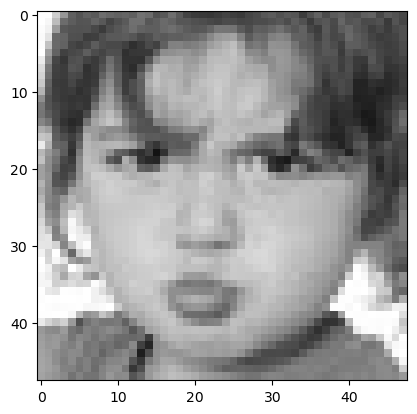

In [4]:
plt.imshow(img_array)

The image is blur because is 48x48

### Prepare the training dataset

In [5]:
Datadirectory = "archive/train/"

In [6]:
Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

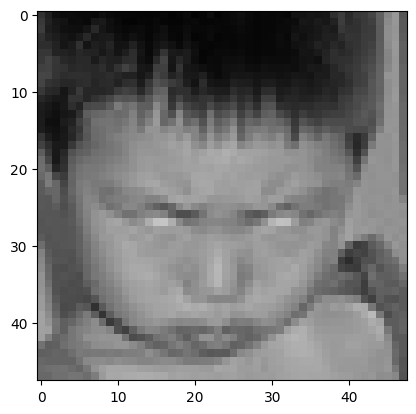

In [7]:
# read the images
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert color space
        plt.imshow(img_array)
        plt.show()
        break
    break

### Reshape the images

I am going to use trasfer learning and for use ise any type of deep leraning classifier  we need to reshape
In the next steps we are going to use mobile net . So for that reason we are changing the shaoe. Our images are 48 x 48

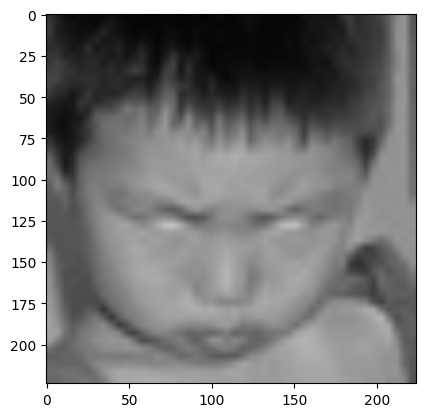

In [8]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)

In [9]:
# let's check the shape
new_array.shape

(224, 224, 3)

### Convert tha images into array

In [10]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [ ]:
create_training_Data() # this will read all the images

In [12]:
print(len(training_Data)) #shortlist

528


### Shuffle the dataset

Ther reason is becuas not in sequence but mixed. So it's robust and doesnt learn the seq

In [13]:
import random
random.shuffle(training_Data)

### Feature and Labels

In [14]:
x = [] # data
y = [] # label

for features, label in training_Data:
    x.append(features) # conitains the images
    y.append(label) # contains the labels

x = np.array(x).reshape(-1, img_size, img_size, 3) # convert the data into 4 dimensions

In [15]:
x.shape

(528, 224, 224, 3)

### Normalise the dataset

WE could use skitlearn for this passage. But instead we are just divide by the max number 255 black

In [16]:
x = x/255.0; 

Let's check the labels

In [17]:
type(y)

list

In [18]:
y[0]

0

In [19]:
y = np.array(y)

In [20]:
y.shape

(528,)

### Training your dataset - Transfer Learning

For training our dataset we eill use mobile net... is a .. transferl.

In [21]:
# First we import the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
# define the pre-trained model. In this case mobileNetV2
model = tf.keras.applications.MobileNetV2()


In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

As we can see from the output, MobileNet works with 224, for that we reshape from 48 to 224. 
It has a lot of 3504872 params

### Fine-Tuning the dataset

In [24]:
# check the first layer
base_input = model.layers[0].input
# check the last layer
base_output = model.layers[-2].output

In [25]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

Now i am taking the last layer (global aver) > to another final layer (new layer) > dense 

In [26]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) # because my clsses are 7, Why softax as last? bacause we are classifying

In [27]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

What i did it? I have remove 'global_average_pooling2d, and and the created layers after  'out_relu[0][0]' 
But i haven't created a model.. 

In [28]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [29]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

Now we can check the output now appears the layers that we have created or the FC

## Compile the training data

In [30]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
new_model.fit(x, y, epochs=5)

Epoch 1/5


17/17 [==============================] - 73s 3s/step - loss: 0.1639 - accuracy: 0.9432
Epoch 2/5
17/17 [==============================] - 60s 4s/step - loss: 1.3603e-05 - accuracy: 1.0000
Epoch 3/5
17/17 [==============================] - 71s 4s/step - loss: 2.6496e-06 - accuracy: 1.0000
Epoch 4/5
17/17 [==============================] - 81s 5s/step - loss: 1.7048e-06 - accuracy: 1.0000
Epoch 5/5
17/17 [==============================] - 68s 4s/step - loss: 1.2530e-06 - accuracy: 1.0000


In [33]:
new_model.save('my_model.h5')

c:\Users\maria\anaconda3\envs\FER_DNN\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
new_model = tf.keras.models.load_model('my_model.h5')

## Deploy an image

We could test our model but instead we are going to deploy an image

In [35]:
frame = cv2.imread("happy.jpg")

In [36]:
frame.shape

(174, 290, 3)

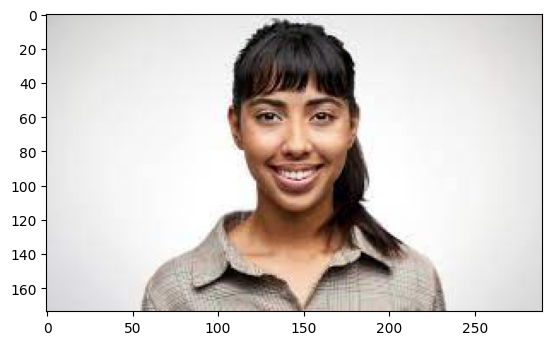

In [38]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Now we need a face detection algortih
haar > already train weights for face detection

In [39]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

i need to converto in gray because haar works with gray

In [40]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [41]:
gray.shape

(174, 290)

In [66]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h), (255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]

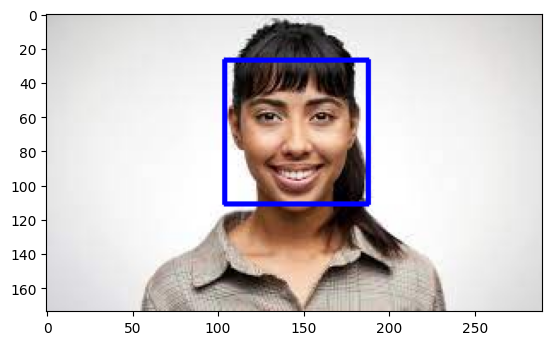

In [67]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

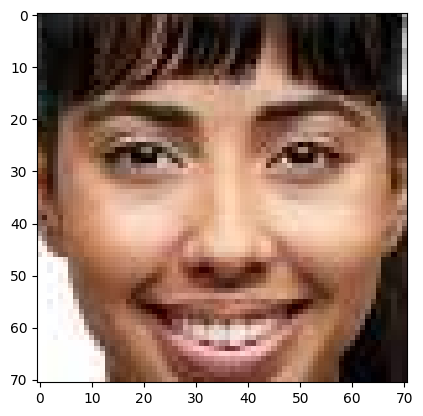

In [68]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [69]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
final_image = final_image/255.0 # normalizing

## Predictions

In [70]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 47ms/step


In [71]:
Predictions[0]

array([1.0000000e+00, 3.1288919e-14, 2.0792317e-15, 1.0469241e-15,
       6.7477091e-14, 1.2013581e-15, 4.3766474e-17], dtype=float32)

In [72]:
np.argmax(Predictions)

0